## Truncation scheme 

By default, the constructor functions that create polynomial expansions are ordered using _graded reversed lexicographical sorting_.
In practice this mostly means that the order of the polynomials are fixed deterministic.
Here is explanation of what that entails.

Each polynomial in an expansion (at least in orthogonal ones) can be determined by a multi-index that refers to the largest exponent among its terms along each dimension.
For example, we defined the bivariate polynomial $\Phi_{nm}$ to be on the form:

$$
\Phi_{nm} = q_0^nq_1^m + \sum_{i<n, j<m}^{i+j< n+m} \alpha_{ij} q_0^i q_1^j
$$

where $\alpha_{ij}$ are scalar coefficients.
For ``chaospy.monomial``, all $\alpha_{ij}$ are zero, reducing the expansion to just the leading term.

We say that the order of this polynomial is $n+m$.

Following the same bivariate, we can iterate through all polynomials:

$$
  \begin{align*}
     k &= 0 &  &\Phi_{00} & &\Phi_0 \\ 
     k &= 1 &  \Phi_{10} &\quad \Phi_{01} & \Phi_{1} &\quad \Phi_{2}\\
     k &= 2 & \Phi_{20} \quad &\Phi_{11} \quad\Phi_{02} & \Phi_{3} \quad &\Phi_{4} \quad\Phi_{5} \\
     k &= 3 & \Phi_{30} \quad \Phi_{21} & \quad \Phi_{12} \quad\Phi_{03} &
   \Phi_{6} \quad \Phi_{7} & \quad \Phi_{8} \quad\Phi_{9} \\
  \end{align*}
$$

Here we also denote the polynomials twice: One with the multi-index and one with a single index.
These polynomials are equivalent.
But in addition, we divide the polynomials into _orders_ defined as $k=n+m$.

When constructing a polynomial expansion in `chaospy`, using the constructors `chaospy.generate_expansion` or `chaospy.monomial`, providing an integer for the order, will truncate the expansion to a specific order.
For example a 3-dimensional expansion truncated at order 20:

In [1]:
import chaospy

expansion = chaospy.monomial(start=0, stop=21, dimensions=2, graded=True)
expansion[:6]

polynomial([1, q0, q1, q0**2, q1**2, q0*q1])

The exponents represents the multi-indices here.
For simplicity, we use the function `chaospy.glexindex` which produces the same exponents more directly, so we can plot them:

In [2]:
indices = chaospy.glexindex(start=0, stop=21, dimensions=2, graded=True)
indices[:6].T

array([[0, 1, 0, 2, 0, 1],
       [0, 0, 1, 0, 2, 1]])

Here `[0, 0]` represents `q0**0*q1**0`, `[1, 0]` represents `q0**1*q1**0`, and so forth.

Alternatively, it is possible to extract the same indices using the `ndpoly.exponents` attribute:

In [3]:
expansion.exponents[:6].T

array([[0, 1, 0, 2, 0, 1],
       [0, 0, 1, 0, 2, 1]], dtype=uint32)

In ether case, the exponents can be visualized as follows:

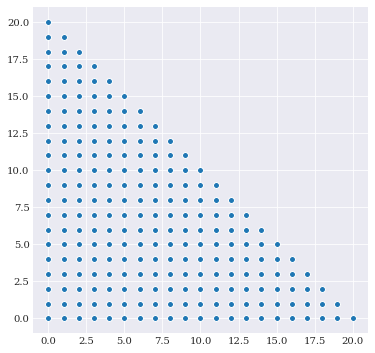

In [4]:
from matplotlib import pyplot

pyplot.rc("figure", figsize=[6, 6])

pyplot.scatter(*indices.T)
pyplot.axis([-1, 21, -1, 21])
pyplot.show()

The dots represents multi-index that are included.
These dots represents a total order truncation scheme, which means that :math:`L_1`-norm of the exponents are limited by the `stop` value, giving this straight bound line.

### The $L_p$-norm

From a metric point of view, this boundary behaves like the indices are limited to 20 under the $L_1$-norm.
Following this perspective, we can change the norm to be any $L_p$ norm.
For example, to increase the cross terms, we can use the $L_{0.6}$ norm:

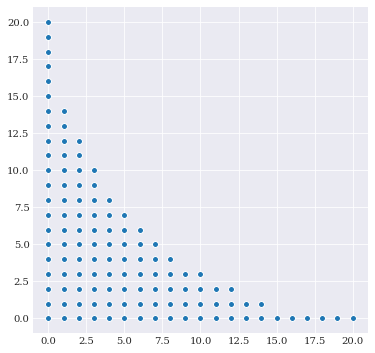

In [5]:
indices = chaospy.glexindex(
    start=0, stop=21, dimensions=2, cross_truncation=0.6)

pyplot.scatter(*indices.T)
pyplot.show()

This represents a more aggressive cross-truncation scheme.

### Full tensor grid

If a full tensor grid is needed, set the norm to be ``numpy.inf``: 

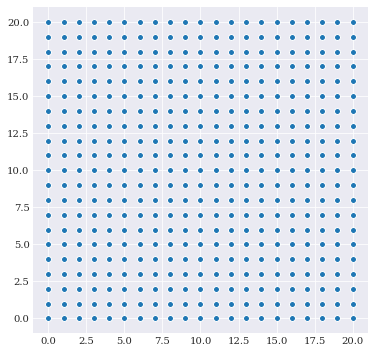

In [6]:
import numpy

indices = chaospy.glexindex(
    start=0, stop=21, dimensions=2, cross_truncation=numpy.inf)

pyplot.scatter(*indices.T)
pyplot.show()

### Dimension prioritization

So far the various dimensions have been limited to a single integer.
However, there is support for different order along the different dimensions.
To get this idea working with the custom norm, we redefine the $L_q$-norm limit to the following inequality:

$$
\left( \sum_i |n_i/b_i|^p\right)^{1/p} \leq 1
$$

Here $b_i$ is the individual limit along dimension $i$.

In practice, this will look as follows:

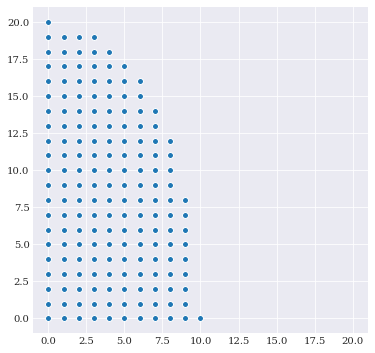

In [7]:
indices = chaospy.glexindex(
    start=0, stop=[11, 21], cross_truncation=2)

pyplot.scatter(*indices.T)
pyplot.axis([-1, 21, -1, 21])
pyplot.show()

Note that the flag `dimensions=2` is omitted, as it is now inferred from the `stop` flag.